In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import imutils
cv2.ocl.setUseOpenCL(False)

In [2]:
def gray(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

In [3]:
LeftImage = imageio.imread('Left.jpg')
RightImage = imageio.imread('Right.jpg')

GrayTrain = gray(RightImage)
GrayQuery = gray(LeftImage)

In [4]:
descriptor = cv2.xfeatures2d.SIFT_create()

KeyPointsA, featuresA = descriptor.detectAndCompute(GrayTrain, None)
KeyPointsB, featuresB = descriptor.detectAndCompute(GrayQuery, None)

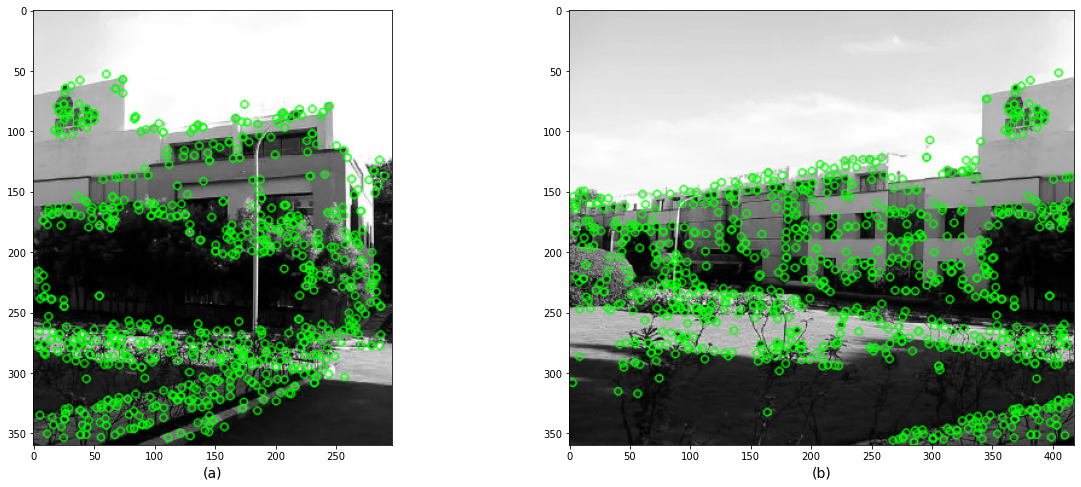

In [5]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(GrayTrain,KeyPointsA,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(GrayQuery,KeyPointsB,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

plt.show()

In [6]:
def matchKeyPointsBF(featuresA, featuresB):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
        
    best_matches = bf.match(featuresA,featuresB)
    
    rawMatches = sorted(best_matches, key = lambda x:x.distance)
    print("Raw matches (Brute force):", len(rawMatches))
    return rawMatches

Raw matches (Brute force): 298


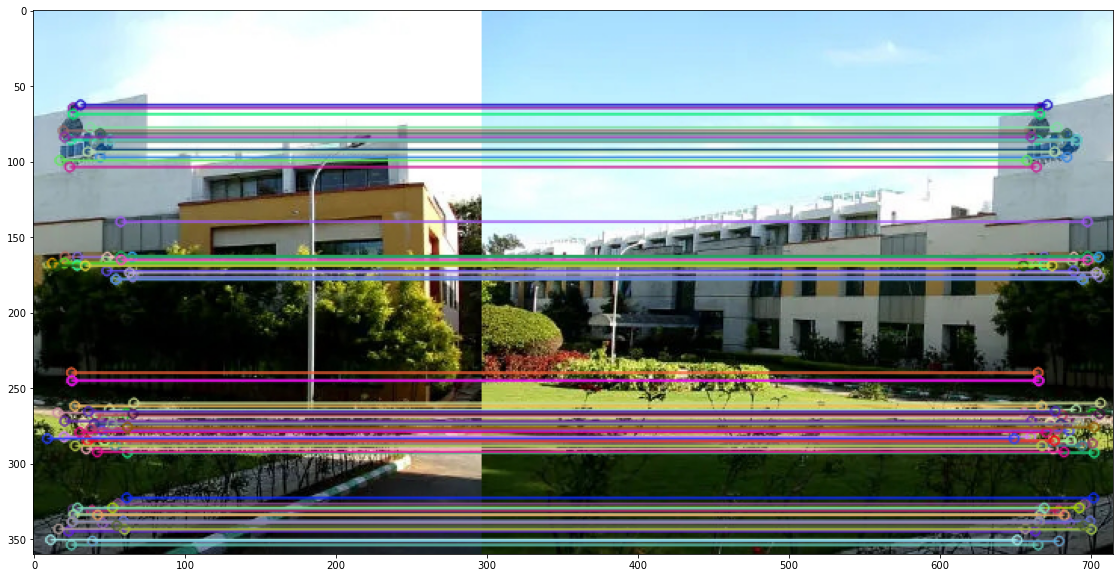

In [7]:
fig = plt.figure(figsize=(20,10))

matches = matchKeyPointsBF(featuresA, featuresB)
MatchImage = cv2.drawMatches(RightImage, KeyPointsA, LeftImage, KeyPointsB, matches[:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(MatchImage)
plt.show()

In [8]:
def findHomography(KeyPointsA, KeyPointsB, matches, reprojThresh):

    KeyPointsA = np.float32([kp.pt for kp in KeyPointsA])
    KeyPointsB = np.float32([kp.pt for kp in KeyPointsB])

    ptsA = np.float32([KeyPointsA[m.queryIdx] for m in matches])
    ptsB = np.float32([KeyPointsB[m.trainIdx] for m in matches])
    
    (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC, reprojThresh)

    return (matches, H, status)

In [9]:
M = findHomography(KeyPointsA, KeyPointsB, matches, reprojThresh=4)
(matches, H, status) = M
print(H)

[[ 9.99703846e-01 -2.17819125e-04  3.43004146e+02]
 [-1.14662484e-04  9.99719360e-01  2.95485396e-02]
 [-5.77504354e-07 -5.56102728e-07  1.00000000e+00]]


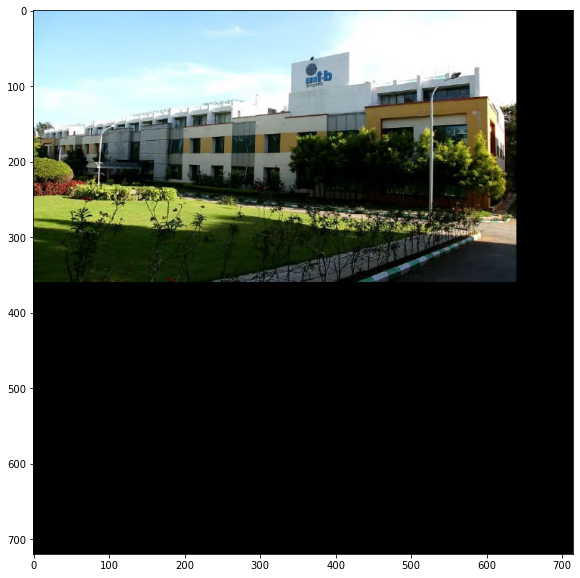

In [10]:
width = RightImage.shape[1] + LeftImage.shape[1]
height = RightImage.shape[0] + LeftImage.shape[0]

result = cv2.warpPerspective(RightImage, H, (width, height))
result[0:LeftImage.shape[0], 0:LeftImage.shape[1]] = LeftImage

plt.figure(figsize=(20,10))
plt.imshow(result)

plt.show()

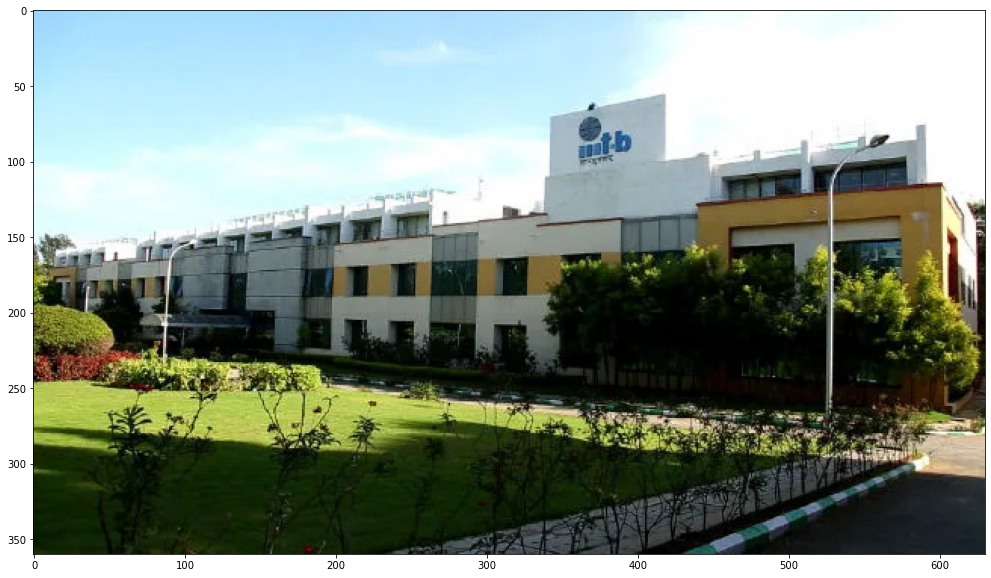

In [11]:
result = result[:360, :630]

plt.figure(figsize=(20,10))
plt.imshow(result)